# Test　the mix augmentation

In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import sys

from scipy.io.wavfile import read, write

In [3]:
from espnet2.asr.frontend.default import DefaultFrontend
import torch

wav1_path = "./wav1.wav"

fs, data1 = read(wav1_path)

frontend = DefaultFrontend()

speech =torch.tensor([data1], dtype = torch.float32) 
speech_length = torch.tensor([len(data1)], dtype = torch.int64) 

feats1, feats_lens1 = frontend.forward(speech, speech_length)

feats_list1 = feats1.tolist()

print(feats1.size(), feats_lens1)

torch.Size([1, 517, 80]) tensor([517])


/home/kinouchitakahiro/Documents/espnet/espnet2/layers/stft.py:164: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  olens = (ilens - self.n_fft) // self.hop_length + 1


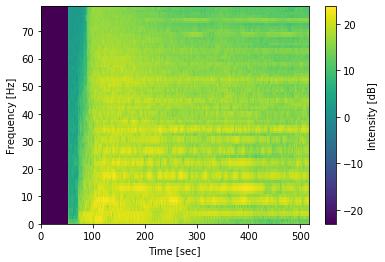

In [4]:

Sxx = np.array(feats_list1[0]).T.tolist()

y = list(range(len(Sxx)))
x = list(range(len(Sxx[0])))


plt.pcolormesh(x,y, Sxx) #intensityを修正
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
cbar = plt.colorbar() #カラーバー表示のため追加
cbar.ax.set_ylabel("Intensity [dB]") #カラーバーの名称表示のため追加
plt.show()

In [7]:
wav2_path = "./wav2.wav"

fs, data2 = read(wav2_path)

frontend = DefaultFrontend()

speech =torch.tensor([data2], dtype = torch.float32) 
speech_length = torch.tensor([len(data2)], dtype = torch.int64) 

feats2, feats_lens2 = frontend.forward(speech, speech_length)

feats_list2 = feats2.tolist()

print(feats2.size(), feats_lens2)

torch.Size([1, 517, 80]) tensor([517])


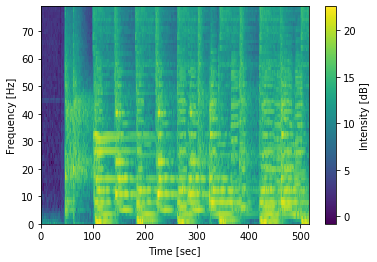

In [8]:

Sxx = np.array(feats_list2[0]).T.tolist()

y = list(range(len(Sxx)))
x = list(range(len(Sxx[0])))


plt.pcolormesh(x,y, Sxx) #intensityを修正
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
cbar = plt.colorbar() #カラーバー表示のため追加
cbar.ax.set_ylabel("Intensity [dB]") #カラーバーの名称表示のため追加
plt.show()

# 自作のミックスAugmentationの作成

tensor([[[-23.0259, -23.0259, -23.0259,  ..., -23.0259, -23.0259, -23.0259],
         [-23.0259, -23.0259, -23.0259,  ..., -23.0259, -23.0259, -23.0259],
         [-23.0259, -23.0259, -23.0259,  ..., -23.0259, -23.0259, -23.0259],
         ...,
         [ 12.6162,  13.4187,  15.3337,  ...,  11.0982,  11.4428,  14.2828],
         [ 14.2750,  13.7696,  15.6776,  ...,  10.7090,  11.1754,  14.4566],
         [ 14.8318,  14.9241,  16.4129,  ...,  11.1704,  10.6597,  13.9805]]]) tensor([517])


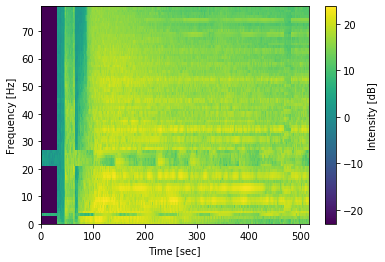

In [22]:
from espnet2.asr.mixaug.mixaug import MixAug


mixaug = MixAug(
            apply_freq_mix=True,
            freq_mix_width_range=(0,10),
            apply_time_mix=True,
            time_mix_width_range=(0,100),
)
feats, feats_lens = mixaug.forward(feats1, feats2, feats_lens1, feats_lens2)

feats_list = feats.tolist()

print(feats, feats_lens)

Sxx = np.array(feats_list[0]).T.tolist()

y = list(range(len(Sxx)))
x = list(range(len(Sxx[0])))


plt.pcolormesh(x,y, Sxx) #intensityを修正
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
cbar = plt.colorbar() #カラーバー表示のため追加
cbar.ax.set_ylabel("Intensity [dB]") #カラーバーの名称表示のため追加
plt.show()